## ROBINHOOD DATA - STOCK EXCHANGE MARKET

### PACKAGES

In [3]:
import pandas as pd
import numpy as np
import time
import warnings
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import time    
import random
from hdbscan import HDBSCAN
import sys
from sklearn.cluster import SpectralClustering
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import numpy as np
from sklearn.metrics import davies_bouldin_score 
from sklearn.metrics.cluster import adjusted_rand_score
import math
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

C:\Users\croon\.conda\conda\envs\Python\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


### DATASET LOADING

In [4]:
df=pd.read_csv('robinhood.csv')

In [5]:
#shape of the dataframe
df.shape

(4610, 33)

In [6]:
# show the names of the columns with the number of observations for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4610 entries, 0 to 4609
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   simple_name              4530 non-null   object 
 1   name                     4610 non-null   object 
 2   symbol                   4610 non-null   object 
 3   bloomberg_unique         4610 non-null   object 
 4   margin_initial_ratio     4610 non-null   float64
 5   maintenance_ratio        4610 non-null   float64
 6   country                  4610 non-null   object 
 7   day_trade_ratio          4610 non-null   float64
 8   list_date                4601 non-null   object 
 9   type                     4610 non-null   object 
 10  default_collar_fraction  4610 non-null   float64
 11  open                     4516 non-null   float64
 12  high                     4516 non-null   float64
 13  low                      4516 non-null   float64
 14  volume                  

In [7]:
# show information only on numerical variables (with include = 'all' also on 
#categorical variables (NaN))
describe=df.describe()
describe

,margin_initial_ratio,maintenance_ratio,day_trade_ratio,default_collar_fraction,open,high,low,volume,average_volume_2_weeks,average_volume,high_52_weeks,dividend_yield,float,low_52_weeks,market_cap,pb_ratio,pe_ratio,shares_outstanding,num_employees,year_founded
count,4610.000000,4610.000000,4610.000000,4.610000e+03,4516.000000,4516.000000,4516.000000,4.610000e+03,4.605000e+03,4.605000e+03,4606.000000,2518.000000,3.940000e+03,4606.000000,4.600000e+03,4374.000000,2831.000000,4.581000e+03,3.667000e+03,3958.000000
mean,0.697258,0.567993,0.291594,5.000000e-02,112.826430,113.982590,111.546498,1.121565e+06,2.592377e+06,2.592377e+06,129.145045,4.033501,2.719619e+08,97.668825,1.117467e+10,98.000813,51.780066,3.112825e+08,1.747928e+04,1978.828196
std,0.216499,0.321737,0.166135,3.934780e-15,4724.671248,4763.573702,4682.206105,4.147020e+06,8.244713e+06,8.244713e+06,5119.623178,5.293302,9.768470e+08,4339.850753,4.765842e+10,5943.977890,580.291424,2.103476e+09,6.200410e+04,39.808034
min,0.500000,0.250000,0.250000,5.000000e-02,0.023400,0.023400,0.015000,0.000000e+00,2.440000e+01,2.440000e+01,0.300000,0.000000,1.656199e+04,0.004500,6.629770e+05,-1456.699400,-5912.240000,3.590000e+04,0.000000e+00,1781.000000
25%,0.500000,0.250000,0.250000,5.000000e-02,6.589500,6.749900,6.407500,3.438700e+04,1.142583e+05,1.142583e+05,11.790000,1.587093,1.918367e+07,4.780000,1.923131e+08,0.956623,10.950000,2.273030e+07,2.440000e+02,1968.000000
50%,0.560000,0.450000,0.250000,5.000000e-02,19.385000,19.695000,19.000000,1.706880e+05,5.344974e+05,5.344974e+05,27.360000,2.799880,5.096457e+07,15.274950,1.048666e+09,1.744670,17.880000,5.602030e+07,1.639000e+03,1993.000000
75%,1.000000,1.000000,0.250000,5.000000e-02,45.767500,46.196250,44.975000,6.768742e+05,1.889334e+06,1.889334e+06,58.312500,4.610292,1.510733e+08,37.175000,5.913145e+09,3.680705,31.181900,1.592538e+08,9.816500e+03,2006.000000
max,1.000000,1.000000,1.000000,5.000000e-02,317460.000000,320072.490000,314607.240000,1.125649e+08,2.077844e+08,2.077844e+08,347400.000000,156.006000,2.677110e+10,294510.580000,1.230000e+12,392670.000000,24741.700000,1.200000e+11,2.200000e+06,2019.000000


In [8]:
#describe including all info
descibe_all=df.describe(include='all')
descibe_all

,simple_name,name,symbol,bloomberg_unique,margin_initial_ratio,maintenance_ratio,country,day_trade_ratio,list_date,type,...,pe_ratio,shares_outstanding,description,ceo,headquarters_city,headquarters_state,sector,industry,num_employees,year_founded
count,4530,4610,4610,4610,4610.000000,4610.000000,4610,4610.000000,4601,4610,...,2831.000000,4.581000e+03,4604,3952,4006,3990,4606,4606,3.667000e+03,3958.000000
unique,4480,4608,4610,4610,NaN,NaN,52,NaN,2566,14,...,NaN,NaN,4548,3857,1185,226,22,173,NaN,NaN
top,Liberty Media,iShares Core Moderate Allocation ETF,LARK,EQ0038317900001000,NaN,NaN,US,NaN,1/2/1990,stock,...,NaN,NaN,Empire State Realty OP LP engages in real esta...,Jamie Forese,New York,California,Finance,Investment Trusts Or Mutual Funds,NaN,NaN
freq,7,2,1,1,NaN,NaN,3636,NaN,399,3145,...,NaN,NaN,3,5,226,531,860,579,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.697258,0.567993,NaN,0.291594,NaN,NaN,...,51.780066,3.112825e+08,NaN,NaN,NaN,NaN,NaN,NaN,1.747928e+04,1978.828196
std,NaN,NaN,NaN,NaN,0.216499,0.321737,NaN,0.166135,NaN,NaN,...,580.291424,2.103476e+09,NaN,NaN,NaN,NaN,NaN,NaN,6.200410e+04,39.808034
min,NaN,NaN,NaN,NaN,0.500000,0.250000,NaN,0.250000,NaN,NaN,...,-5912.240000,3.590000e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1781.000000
25%,NaN,NaN,NaN,NaN,0.500000,0.250000,NaN,0.250000,NaN,NaN,...,10.950000,2.273030e+07,NaN,NaN,NaN,NaN,NaN,NaN,2.440000e+02,1968.000000
50%,NaN,NaN,NaN,NaN,0.560000,0.450000,NaN,0.250000,NaN,NaN,...,17.880000,5.602030e+07,NaN,NaN,NaN,NaN,NaN,NaN,1.639000e+03,1993.000000
75%,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,0.250000,NaN,NaN,...,31.181900,1.592538e+08,NaN,NaN,NaN,NaN,NaN,NaN,9.816500e+03,2006.000000


In [9]:
#columns
df.columns

Index(['simple_name', 'name', 'symbol', 'bloomberg_unique',
       'margin_initial_ratio', 'maintenance_ratio', 'country',
       'day_trade_ratio', 'list_date', 'type', 'default_collar_fraction',
       'open', 'high', 'low', 'volume', 'average_volume_2_weeks',
       'average_volume', 'high_52_weeks', 'dividend_yield', 'float',
       'low_52_weeks', 'market_cap', 'pb_ratio', 'pe_ratio',
       'shares_outstanding', 'description', 'ceo', 'headquarters_city',
       'headquarters_state', 'sector', 'industry', 'num_employees',
       'year_founded'],
      dtype='object')

In [10]:
#reduced dataset
df1=df[['name','margin_initial_ratio', 'maintenance_ratio',
       'day_trade_ratio', 'type', 'default_collar_fraction',
       'open', 'high', 'low','average_volume', 'high_52_weeks',
       'low_52_weeks', 'market_cap',
       'shares_outstanding','sector']]
#set the index as the name
df1.set_index('name',inplace=True)

In [11]:
#identification missing values (and counting)
missing_data = df1.isnull()
missing_data.head(5)
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

margin_initial_ratio
False    4610
Name: margin_initial_ratio, dtype: int64

maintenance_ratio
False    4610
Name: maintenance_ratio, dtype: int64

day_trade_ratio
False    4610
Name: day_trade_ratio, dtype: int64

type
False    4610
Name: type, dtype: int64

default_collar_fraction
False    4610
Name: default_collar_fraction, dtype: int64

open
False    4516
True       94
Name: open, dtype: int64

high
False    4516
True       94
Name: high, dtype: int64

low
False    4516
True       94
Name: low, dtype: int64

average_volume
False    4605
True        5
Name: average_volume, dtype: int64

high_52_weeks
False    4606
True        4
Name: high_52_weeks, dtype: int64

low_52_weeks
False    4606
True        4
Name: low_52_weeks, dtype: int64

market_cap
False    4600
True       10
Name: market_cap, dtype: int64

shares_outstanding
False    4581
True       29
Name: shares_outstanding, dtype: int64

sector
False    4606
True        4
Name: sector, dtype: int64



In [12]:
#in order to consider only the financial instruments for wich we have complete information we remove 
#those for which we have missing values
df1.dropna(inplace=True)
df1.shape

C:\Users\croon\.conda\conda\envs\Python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(4497, 14)

### EXPLORATORY DATA ANALYSIS

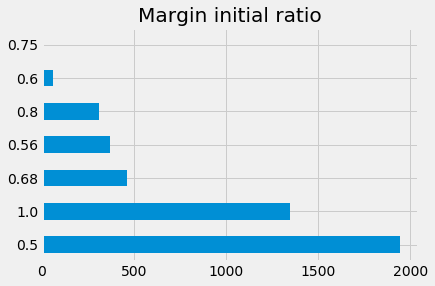

In [13]:
#plot for margin initial ratio
plt.style.use('fivethirtyeight')
df1.margin_initial_ratio.value_counts().plot.barh()
plt.title('Margin initial ratio')
plt.savefig('Margin_initial_ratio')

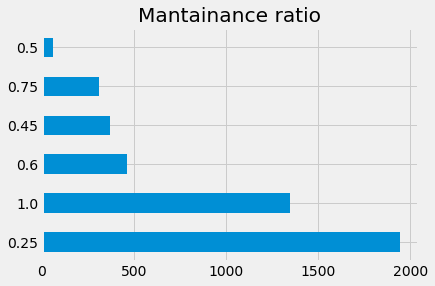

In [14]:
#plot for mantainance ratio
df1.maintenance_ratio.value_counts().plot.barh()
plt.title('Mantainance ratio')
plt.savefig('Mantainance_ratio')

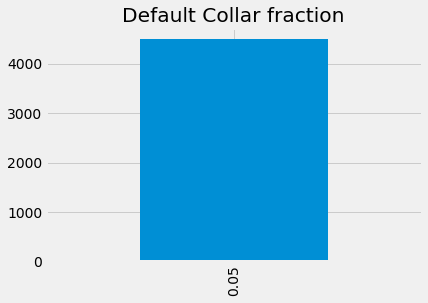

In [15]:
df1.default_collar_fraction.value_counts().plot.bar()
plt.title('Default Collar fraction')
plt.savefig('Default_Collar_Fraction')

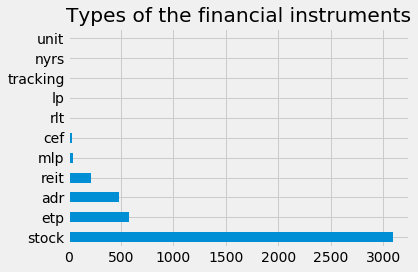

In [16]:
df1.type.value_counts().plot.barh()
plt.title('Types of the financial instruments')
plt.tight_layout()
plt.savefig('Types_finantial_instruments')

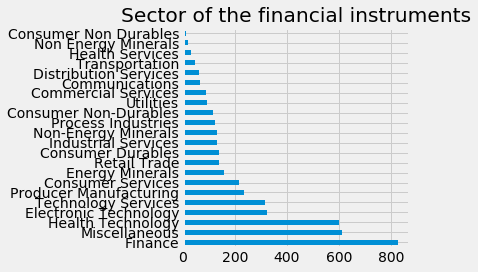

In [17]:
df1.sector.value_counts().plot.barh()
plt.title('Sector of the financial instruments')
plt.tight_layout()
plt.savefig('Sectors')

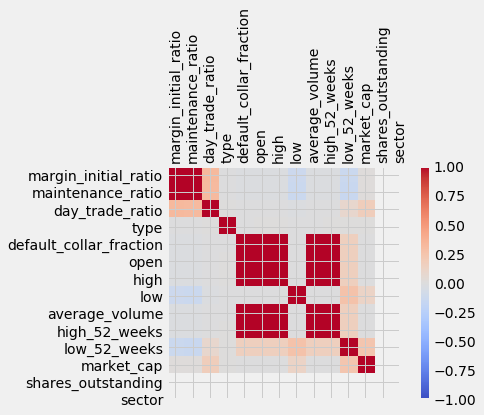

<Figure size 432x288 with 0 Axes>

In [18]:
corr = df1.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df1.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df1.columns)
ax.set_yticklabels(df1.columns)
plt.show()
plt.savefig('Correlation_matrix_with_correlated')

Sice there are higly correlated variables I consider only the ones that are not correlated between each other and that are important for the purpose of the analysis, dropping the most correlated 

In [19]:
# Create correlation matrix
corr_matrix = df1.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [20]:
# Drop features 
df1.drop(df1[to_drop], axis=1,inplace=True)

C:\Users\croon\.conda\conda\envs\Python\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
df1.head(3)

,margin_initial_ratio,day_trade_ratio,type,default_collar_fraction,open,average_volume,market_cap,shares_outstanding,sector
name,,,,,,,,,
Aurora Cannabis Inc. Common Shares,1.0,0.25,stock,0.05,1.35,26813041.8,1.576224e+09,1.168980e+09,Process Industries
Ford Motor Company,0.5,0.25,stock,0.05,7.09,98639445.3,2.759671e+10,3.965050e+09,Consumer Durables
General Electric Company,0.5,0.25,stock,0.05,11.06,90629654.7,9.509370e+10,8.738434e+09,Electronic Technology


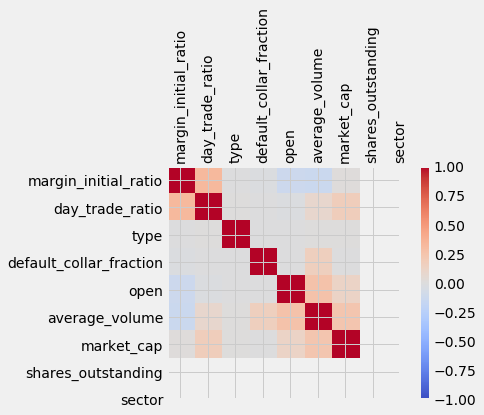

In [22]:
corr = df1.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df1.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df1.columns)
ax.set_yticklabels(df1.columns)
plt.show()


### ENCODING THE OBJECT VARIABLES AND STANDARDIZATION OF THE DATASET

In [23]:
le=LabelEncoder()
df1['type']=le.fit_transform(df1['type'])
df1['sector']=le.fit_transform(df1['sector'])

C:\Users\croon\.conda\conda\envs\Python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\croon\.conda\conda\envs\Python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
df1

,margin_initial_ratio,day_trade_ratio,type,default_collar_fraction,open,average_volume,market_cap,shares_outstanding,sector
name,,,,,,,,,
Aurora Cannabis Inc. Common Shares,1.00,0.25,8,0.05,1.3500,26813041.8,1.576224e+09,1.168980e+09,16
Ford Motor Company,0.50,0.25,8,0.05,7.0900,98639445.3,2.759671e+10,3.965050e+09,2
General Electric Company,0.50,0.25,8,0.05,11.0600,90629654.7,9.509370e+10,8.738434e+09,7
Microsoft Corporation Common Stock,0.50,0.25,8,0.05,168.4800,66904114.6,1.230000e+12,7.606050e+09,19
"GoPro, Inc. Class A Common Stock",0.60,0.25,8,0.05,4.0300,5832852.4,5.920043e+08,1.559960e+08,2
...,...,...,...,...,...,...,...,...,...
Albany International Corp Class A,0.50,0.25,8,0.05,67.8000,372835.5,2.065437e+09,3.230802e+07,16
Monocle Acquisition Corporation Common Stock,0.50,0.25,8,0.05,10.1829,110374.7,2.263648e+08,2.228000e+07,9
Regal Beloit Corporation,0.50,0.25,8,0.05,80.2700,396681.4,3.156376e+09,4.065400e+07,17


In [25]:
head=df1.head()

In [26]:
head.to_latex('Head')

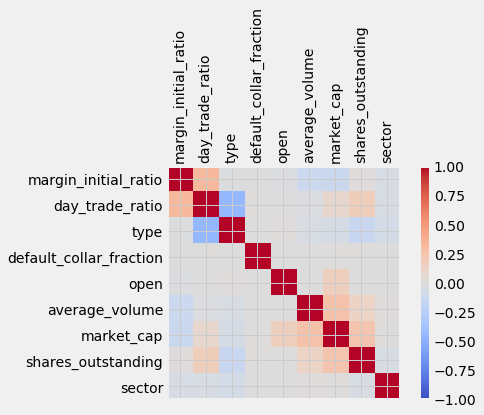

<Figure size 432x288 with 0 Axes>

In [27]:
corr = df1.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df1.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df1.columns)
ax.set_yticklabels(df1.columns)
plt.show()
plt.savefig('correlation_plot')

In [28]:
df1.columns

Index(['margin_initial_ratio', 'day_trade_ratio', 'type',
       'default_collar_fraction', 'open', 'average_volume', 'market_cap',
       'shares_outstanding', 'sector'],
      dtype='object')

### CLUSTERING ANALYSIS

In [29]:
#Dataset used for clustering is a copy of the df1, in order to append the labels to original dataset
#and make comparisons to the different labels assigned
X=df1.copy()

In [30]:
describe=X.describe()
describe

,margin_initial_ratio,day_trade_ratio,type,default_collar_fraction,open,average_volume,market_cap,shares_outstanding,sector
count,4497.000000,4497.000000,4497.000000,4.497000e+03,4497.000000,4.497000e+03,4.497000e+03,4.497000e+03,4497.000000
mean,0.695308,0.291694,6.150767,5.000000e-02,113.212213,2.652960e+06,1.137383e+10,3.153890e+08,10.985768
std,0.216077,0.166362,2.994500,3.747419e-15,4734.639596,8.333686e+06,4.816942e+10,2.121961e+09,4.974649
min,0.500000,0.250000,0.000000,5.000000e-02,0.023400,1.595000e+02,6.629770e+05,4.000000e+04,0.000000
25%,0.500000,0.250000,4.000000,5.000000e-02,6.610000,1.274827e+05,2.028673e+08,2.342000e+07,8.000000
50%,0.560000,0.250000,8.000000,5.000000e-02,19.474000,5.656507e+05,1.089607e+09,5.672700e+07,11.000000
75%,1.000000,0.250000,8.000000,5.000000e-02,45.820000,1.975660e+06,6.011920e+09,1.630760e+08,13.000000
max,1.000000,1.000000,10.000000,5.000000e-02,317460.000000,2.077844e+08,1.230000e+12,1.200000e+11,21.000000


#### 1. K-means clustering

In [76]:
range_n_clusters = [2, 3, 4,5,6,7,8,9]
for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

For n_clusters = 2 The average silhouette_score is : 0.9731544638226378
For n_clusters = 3 The average silhouette_score is : 0.9293051974295027
For n_clusters = 4 The average silhouette_score is : 0.8888264314123155
For n_clusters = 5 The average silhouette_score is : 0.8436338093851227
For n_clusters = 6 The average silhouette_score is : 0.8322716548529558
For n_clusters = 7 The average silhouette_score is : 0.8006391317945796
For n_clusters = 8 The average silhouette_score is : 0.800937754546688
For n_clusters = 9 The average silhouette_score is : 0.7978902203597865


The better choice for the dataset in terms of k-means clustering is the number of two clusters

In [77]:
#silhouette score
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_pred1 = kmeans.fit_predict(X)
k_sil=metrics.silhouette_score(X, y_pred1)
print(k_sil)

0.9731544638226378


In [78]:
#Davis Bouldin score
k_DB=metrics.davies_bouldin_score(X, y_pred1)

In [79]:
#calinski_harabasz_score
k_CH=metrics.calinski_harabasz_score(X,y_pred1)

In [80]:
print('Silhouette score: ',k_sil)
print('Davies Bouldin score: ',k_DB)
print('calinski harabasz score: ',k_CH)

Silhouette score:  0.9731544638226378
Davies Bouldin score:  0.41787389537994524
calinski harabasz score:  6369.470581927621


In [81]:
unique, counts = np.unique(y_pred1, return_counts=True)
dict(zip(unique, counts))

{0: 4483, 1: 14}

In [82]:
df1['kmeans_labels'] = pd.Series(y_pred1, index=df1.index)

C:\Users\croon\.conda\conda\envs\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [83]:
df1[df1['kmeans_labels']==1]

,margin_initial_ratio,day_trade_ratio,type,default_collar_fraction,open,average_volume,market_cap,shares_outstanding,sector,kmeans_labels
name,,,,,,,,,,
Microsoft Corporation Common Stock,0.5,0.25,8,0.05,168.4800,66904114.6,1.230000e+12,7.606050e+09,19,1
Apple Inc. Common Stock,0.5,0.25,8,0.05,296.4400,63424086.5,1.200000e+12,4.375480e+09,7,1
"Facebook, Inc. Class A Common Stock",0.5,0.25,8,0.05,189.1400,22324071.8,5.300000e+11,2.852000e+09,19,1
"American Depositary Shares, each represents eight Ordinary Shares",0.5,0.25,0,0.05,209.4900,20990418.7,5.560000e+11,2.682722e+09,18,1
"Amazon.com, Inc. Common Stock",0.5,0.25,8,0.05,1945.1100,6323474.2,9.380000e+11,4.978100e+08,18,1
VISA Inc.,0.5,0.25,8,0.05,190.3600,15029172.2,3.900000e+11,2.147606e+09,9,1
Tencent Holdings Limited Unsponsored ADR Representing B Shares (Cayman Islands),1.0,1.00,0,0.05,50.7800,5962472.8,4.760000e+11,9.477422e+09,1,1
BERKSHIRE HATHAWAY Class B,0.5,0.25,8,0.05,212.1400,8521561.1,5.020000e+11,2.435990e+09,9,1
Alphabet Inc. Class A Common Stock,0.5,0.25,8,0.05,1358.4500,2612071.2,9.210000e+11,6.873161e+08,19,1


The analysis shows a particularly significant result. All the labels == 1 corresponds to extremely valuable finantial instruments traded of the stock market. This could be understood from the fact that, apart from the fact that are all well known companies, the marginal initial ratio never exceed the value of 1, that is what it should be. 
A significant value that characterizes the cluster is the opening price. The opening price is the price at which a security first trades upon the opening of an exchange on a trading day; for example, the New York Stock Exchange (NYSE) opens at precisely 9:30 a.m. Eastern time. The price of the first trade for any listed stock is its daily opening price. In this case the opening price is usually high, exception made for the 'Berkshire Hathaway Inc.'. In this case is much higher then all the others, that explain the sensitively lower value of the volume of 

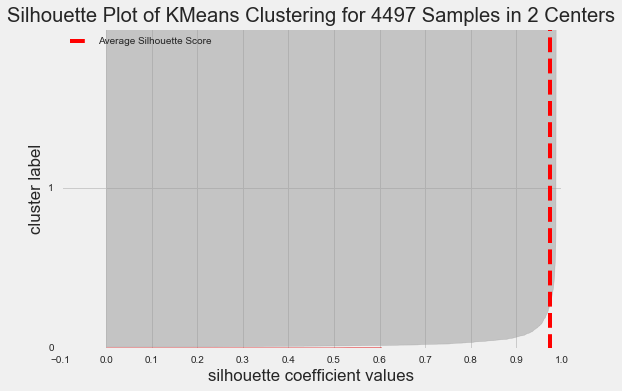

In [84]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
model = SilhouetteVisualizer(KMeans(2))
model.fit(X)
model.show()

#### 2. Spectral clustering

In [85]:
#Grid search for finding the parameters
parameters = []
# Starting a tally of total iterations
n_clusters_space=[2,3,4,5]
assign_labels_space=['kmeans', 'discretize']
n_iterations = 0

# Looping over each combination of hyperparameters
for n_clusters in n_clusters_space:
    for assign_labels in assign_labels_space:
        spectral_grid = SpectralClustering(n_clusters=n_clusters,affinity='nearest_neighbors',assign_labels=assign_labels)
        # fit_transform
        clusters = spectral_grid.fit_predict(X = X)
        spectral_silhouette=metrics.silhouette_score(X, clusters)
        # Increasing the iteration tally with each run of the loop
        n_iterations += 1
        # Appending the lst each time n_clusters criteria is reached
        if spectral_silhouette>= 0.5:
            parameters.append([n_clusters,
                               assign_labels,
                               spectral_silhouette])

parameters

[[2, 'kmeans', 0.728799224568393], [2, 'discretize', 0.6748651073177069]]

In [86]:
cl2 = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', 
                            eigen_tol=0.0, assign_labels="discretize").fit(X)
y_pred2 = cl2.fit_predict(X)
spectral_silhouette=metrics.silhouette_score(X, y_pred2)
print(spectral_silhouette)

0.6748651073177069


In [87]:
cl2_1 = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', 
                            eigen_tol=0.0, assign_labels="kmeans").fit(X)
y_pred2_1 = cl2_1.fit_predict(X)
#silhouette coefficient
spec_sil=metrics.silhouette_score(X, y_pred2_1)
#Davis Bouldin score
spec_DB=metrics.davies_bouldin_score(X, y_pred2_1)
#calinski_harabasz_score
spec_CH=metrics.calinski_harabasz_score(X,y_pred2_1)

#printing results
print('Silhouette score: ',spec_sil)
print('Davies Bouldin score: ',spec_DB)
print('calinski harabasz score: ',spec_CH)

Silhouette score:  0.728799224568393
Davies Bouldin score:  0.9230375262914471
calinski harabasz score:  999.694616695816


In [88]:
unique, counts = np.unique(y_pred2_1, return_counts=True)
dict(zip(unique, counts))

{0: 3682, 1: 815}

In [89]:
df1['Spectral_labels'] = pd.Series(y_pred2_1, index=df1.index)

C:\Users\croon\.conda\conda\envs\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
df1[df1['Spectral_labels']==1].head()

,margin_initial_ratio,day_trade_ratio,type,default_collar_fraction,open,average_volume,market_cap,shares_outstanding,sector,kmeans_labels,Spectral_labels
name,,,,,,,,,,,
Ford Motor Company,0.5,0.25,8,0.05,7.09,98639445.3,2.759671e+10,3.965050e+09,2,0,1
General Electric Company,0.5,0.25,8,0.05,11.06,90629654.7,9.509370e+10,8.738434e+09,7,0,1
Microsoft Corporation Common Stock,0.5,0.25,8,0.05,168.48,66904114.6,1.230000e+12,7.606050e+09,19,1,1
Apple Inc. Common Stock,0.5,0.25,8,0.05,296.44,63424086.5,1.200000e+12,4.375480e+09,7,1,1
The Walt Disney Company,0.5,0.25,8,0.05,119.00,20819523.9,2.120000e+11,1.805440e+09,5,0,1


#### 3. Hierarchical clustering

In [91]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
y_pred3=cluster.fit_predict(X)

In [92]:
spec_sil=metrics.silhouette_score(X, y_pred3)
#Davis Bouldin score
spec_DB=metrics.davies_bouldin_score(X, y_pred3)
#calinski_harabasz_score
spec_CH=metrics.calinski_harabasz_score(X,y_pred3)

#printing results
print('Silhouette score: ',spec_sil)
print('Davies Bouldin score: ',spec_DB)
print('calinski harabasz score: ',spec_CH)

Silhouette score:  0.9817638611958669
Davies Bouldin score:  0.14773528981225986
calinski harabasz score:  4653.869224925884


In [93]:
unique, counts = np.unique(y_pred3, return_counts=True)
dict(zip(unique, counts))

{0: 4492, 1: 5}

In [94]:
df1['Hierarchical_labels'] = pd.Series(y_pred3, index=df1.index)
df1[df1['Hierarchical_labels']==1]

C:\Users\croon\.conda\conda\envs\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,margin_initial_ratio,day_trade_ratio,type,default_collar_fraction,open,average_volume,market_cap,shares_outstanding,sector,kmeans_labels,Spectral_labels,Hierarchical_labels
name,,,,,,,,,,,,
Microsoft Corporation Common Stock,0.5,0.25,8,0.05,168.48,66904114.6,1.230000e+12,7.606050e+09,19,1,1,1
Apple Inc. Common Stock,0.5,0.25,8,0.05,296.44,63424086.5,1.200000e+12,4.375480e+09,7,1,1,1
"Amazon.com, Inc. Common Stock",0.5,0.25,8,0.05,1945.11,6323474.2,9.380000e+11,4.978100e+08,18,1,1,1
Alphabet Inc. Class A Common Stock,0.5,0.25,8,0.05,1358.45,2612071.2,9.210000e+11,6.873161e+08,19,1,1,1
Alphabet Inc. Class C Capital Stock,0.5,0.25,8,0.05,1359.95,2405131.3,9.210000e+11,6.873161e+08,19,1,1,1


#### 4. DBSCAN Clustering Analysis

In [95]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

clust = OPTICS(min_samples=50, xi=.05, min_cluster_size=.05)

# Run the fit
clust.fit(X)

labels_050 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=0.5)
labels_200 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=2)

space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

Text(0.5, 1.0, 'Reachability Plot')

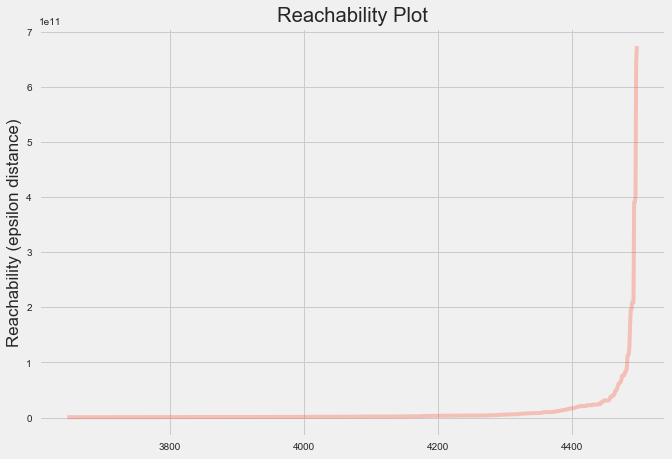

In [96]:
plt.figure(figsize=(10, 7))
for i in range(0,5):
    Xk = space[labels == i]
    Rk = reachability[labels == i]
plt.plot(Xk, Rk, alpha=0.3)
plt.plot(space[labels == -1], reachability[labels == -1], alpha=0.3)

plt.ylabel('Reachability (epsilon distance)')
plt.title('Reachability Plot')

##### Parameter selection for the DBSCAN

In [ ]:
#best parameters: 
#eps: 0.4
#min_sample:4
#metric: 'Hamming'
#silhouette reached: 0.30

In [97]:
cl4 = DBSCAN(eps=0.4, min_samples=4,metric='hamming').fit(X)
y_pred4=cl4.fit_predict(X)
#silhouette
dbscan_sil=metrics.silhouette_score(X, y_pred4)

#Davis Bouldin score
dbscan_DB=metrics.davies_bouldin_score(X, y_pred4)
#calinski_harabasz_score
dbscan_CH=metrics.calinski_harabasz_score(X,y_pred4)

#printing results
print('Silhouette score: ',dbscan_sil)
print('Davies Bouldin score: ', dbscan_DB)
print('calinski harabasz score: ',dbscan_CH)

Silhouette score:  0.30138978251232845
Davies Bouldin score:  1.2180642943785673
calinski harabasz score:  0.2931461892534462


In [98]:
unique, counts = np.unique(y_pred4, return_counts=True)
dict(zip(unique, counts))

{-1: 4493, 0: 4}

In [99]:
df1['DBSCAN_labels'] = pd.Series(y_pred4, index=df1.index)
df1[df1['DBSCAN_labels']==0]

C:\Users\croon\.conda\conda\envs\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,margin_initial_ratio,day_trade_ratio,type,default_collar_fraction,open,average_volume,market_cap,shares_outstanding,sector,kmeans_labels,Spectral_labels,Hierarchical_labels,DBSCAN_labels
name,,,,,,,,,,,,,
Liberty Media Corporation Series C Liberty Formula One Common Stock,0.5,0.25,9,0.05,37.34,1800694.9,2.442181e+10,231653000.0,5,0,1,0,0
Liberty Media Corporation Series A Liberty Formula One Common Stock,0.5,0.25,9,0.05,36.83,226249.2,2.442181e+10,231653000.0,5,0,1,0,0
Liberty Media Corporation Series A Liberty SiriusXM Common Stock,0.5,0.25,9,0.05,45.56,979856.5,2.442181e+10,315322000.0,5,0,1,0,0
Liberty Media Corporation Series C Liberty SiriusXM Common Stock,0.5,0.25,9,0.05,46.33,959044.9,2.442181e+10,315322000.0,5,0,1,0,0


#### 5. HDBSCAN

In [100]:
hdb = HDBSCAN(algorithm='best', alpha=1.0, leaf_size=40,metric='euclidean',
                  min_cluster_size=10,
                  cluster_selection_epsilon=0.5,
                  min_samples=None).fit(X)
y_pred5=hdb.fit_predict(X)
#silhouette
hdbscan_sil=metrics.silhouette_score(X, y_pred5)

#Davis Bouldin score
hdbscan_DB=metrics.davies_bouldin_score(X, y_pred5)
#calinski_harabasz_score
hdbscan_CH=metrics.calinski_harabasz_score(X,y_pred5)

#printing results
print('Silhouette score: ',hdbscan_sil)
print('Davies Bouldin score: ', hdbscan_DB)
print('calinski harabasz score: ',hdbscan_CH)

Silhouette score:  -0.03738139696585701
Davies Bouldin score:  4.194826277934234
calinski harabasz score:  14.255633731900158


In [101]:
unique, counts = np.unique(y_pred5, return_counts=True)
dict(zip(unique, counts))

{-1: 1752,
 0: 11,
 1: 14,
 2: 11,
 3: 21,
 4: 21,
 5: 19,
 6: 10,
 7: 13,
 8: 36,
 9: 12,
 10: 55,
 11: 41,
 12: 51,
 13: 47,
 14: 59,
 15: 12,
 16: 63,
 17: 35,
 18: 58,
 19: 10,
 20: 22,
 21: 12,
 22: 65,
 23: 41,
 24: 37,
 25: 34,
 26: 33,
 27: 17,
 28: 25,
 29: 23,
 30: 23,
 31: 15,
 32: 19,
 33: 45,
 34: 26,
 35: 19,
 36: 23,
 37: 43,
 38: 42,
 39: 1471,
 40: 47,
 41: 64}

In [102]:
df1['HDBSCAN_labels'] = pd.Series(y_pred5, index=df1.index)

C:\Users\croon\.conda\conda\envs\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [103]:
df1.head()

,margin_initial_ratio,day_trade_ratio,type,default_collar_fraction,open,average_volume,market_cap,shares_outstanding,sector,kmeans_labels,Spectral_labels,Hierarchical_labels,DBSCAN_labels,HDBSCAN_labels
name,,,,,,,,,,,,,,
Aurora Cannabis Inc. Common Shares,1.0,0.25,8,0.05,1.35,26813041.8,1.576224e+09,1.168980e+09,16,0,0,0,-1,-1
Ford Motor Company,0.5,0.25,8,0.05,7.09,98639445.3,2.759671e+10,3.965050e+09,2,0,1,0,-1,-1
General Electric Company,0.5,0.25,8,0.05,11.06,90629654.7,9.509370e+10,8.738434e+09,7,0,1,0,-1,-1
Microsoft Corporation Common Stock,0.5,0.25,8,0.05,168.48,66904114.6,1.230000e+12,7.606050e+09,19,1,1,1,-1,-1
"GoPro, Inc. Class A Common Stock",0.6,0.25,8,0.05,4.03,5832852.4,5.920043e+08,1.559960e+08,2,0,0,0,-1,-1


#### MY DBSCAN

In [31]:
def NIC_DBSCAN(Data, eps, MinPts):
    Data= np.array(Data) #trasformo in array i dati
    labels=[] #inizializzazione labels
    Neighbors=[] #inizializzazione neighbors
    Cluster = 0  #inizializzo cluster a zero
    
    #popolazione della lista di labels con zero
    for i in range(len(Data)):
            labels.append(0)
     
    #for loop per definire di continuare se il punto non è già
    #stato assegnato
    for z in range(len(Data)): 
        if labels[z] != 0:
            continue
            #trovare neighbors basandosi su hamming distance
            #neigh_finding(Data,z,eps)
            for j in range(len(Data)):
                #compute hamming distance: numero di bit differenti tra due numeri
                dist = 0
                for h in range(31,-1,-1):
                    b1= Data[z]>>h&1 #>>: Data[z] sciftato a destra di n bits
                                      #&: associo ad ogni bit di output valore di uno se il bit corrispondente è 1, altrimenti zero 
                    b2 = Data[j]>>h&1 
                    dist+= not(b1==b2) #se b1 e b2 non sono uguali 
                if dist < eps:
                    Neighbors.append(j)    
                
        #se non raggiunge numero minimo punti nel raggio eps
        if len(Neighbors) < MinPts:
            labels[z] == -1 #classificare come noise         
        #se il numero di punti necessari raggiunto 
        else: 
            Cluster += 1  
            labels[z] = Cluster
            #incrementare l'ID del cluster     
            #se il numero del clustr è incrementato itero per trovare 
            #neighbors del punto e definire quali fanno parte del cluster
            k = 0
            P = Neighbors[k]
            while k < len(Neighbors): #fino a quando k è minore del numero di
                                                #punti in Neighbors allora continuare

                if labels[P] == -1: #Se non ha abbastanza punti ma fa comunque parte del cluster (border point)
                    labels[P] = Cluster

                elif labels[P] == 0: #se ha abbastanza punti assegno al cluster
                    labels[P] = Cluster
                    #Per ogni core point procedo a calcolare altri core points
                    #per definire i density-reachable points
                    P_Neighbors=[]
                    for P_2 in range(0, len(Data)):
                        #hamming distance: numero di bit differenti tra due numeri
                        dist2 = 0
                        for h in range(31,-1,-1):
                            b1= Data[P]>>h&1
                            b2 = Data[P_2]>>h&1
                            dist2+= not(b1==b2)
                        if dist2 < eps:
                            Neighbors.append(P_2)  
                        
                    if len(P_Neighbors) >= MinPts:
                        Neighbors = Neighbors + P_Neighbors
                k += 1         
                
    return labels

In [51]:
labels=NIC_DBSCAN(X, 1, 4)
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))

{0: 4497}